In [4]:
import pandas as pd
import numpy as np

# Config
np.random.seed(42)
dates = pd.date_range(start='2021-01-01', end='2024-12-31')
stores = ['Store_A', 'Store_B', 'Store_C', 'Store_D', 'Store_E']

# Build data
data = []
for store in stores:
    base = np.random.randint(180, 250)
    trend = np.linspace(0, 50, len(dates))
    seasonality = 30 * np.sin(2 * np.pi * dates.dayofyear / 365.25)
    noise = np.random.normal(0, 15, len(dates))
    promo = np.random.choice([0, 1], size=len(dates), p=[0.8, 0.2])
    sales = base + trend + seasonality + promo * 50 + noise

    for date, s, p in zip(dates, sales, promo):
        data.append([date, store, round(s, 2), p])

df = pd.DataFrame(data, columns=['Date', 'Store', 'Sales', 'Promotion'])

# Save CSV
df.to_csv('/content/retail_sales_data.csv', index=False)

# Show preview
df.head()


,Date,Store,Sales,Promotion
0,2021-01-01,Store_A,214.84,0
1,2021-01-02,Store_A,236.85,0
2,2021-01-03,Store_A,236.80,0
3,2021-01-04,Store_A,248.32,0
4,2021-01-05,Store_A,225.00,0


In [5]:
from google.colab import files
files.download('/content/retail_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Import packages**

In [6]:
import pandas as pd
from prophet import Prophet #facebook library for time series forecasting
import matplotlib.pyplot as plt

## **Load your sales data**

In [7]:
# Load your dataset
df = pd.read_csv('sales_data.csv')

# Ensure correct column names for Prophet
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Check the first few rows
df.head()


,ds,y
0,2022-01-01,205.31
1,2022-01-02,199.31
2,2022-01-03,207.51
3,2022-01-04,216.61
4,2022-01-05,199.38


## **Initialize Prophet & train model**

In [24]:
# Create model
model = Prophet()

# Fit the model...to learn the patterns
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/5rxb9m7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/kzvbkqk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77786', 'data', 'file=/tmp/tmp9o55tbtm/5rxb9m7q.json', 'init=/tmp/tmp9o55tbtm/kzvbkqk6.json', 'output', 'file=/tmp/tmp9o55tbtm/prophet_modelb2lk2_4o/prophet_model-20250702182146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Forecast future sales**

In [23]:
# Make a dataframe for future dates (next 90 days ahead)
future = model.make_future_dataframe(periods=90)


# Predict for future
forecast = model.predict(future)

# View forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1181,2025-03-27,220.910595,208.067548,233.068823
1182,2025-03-28,221.869897,209.260107,235.986692
1183,2025-03-29,221.614296,210.174260,234.323336
1184,2025-03-30,221.251536,208.710355,233.479502
1185,2025-03-31,219.474383,207.641336,232.457729


## **Plot the forecast**

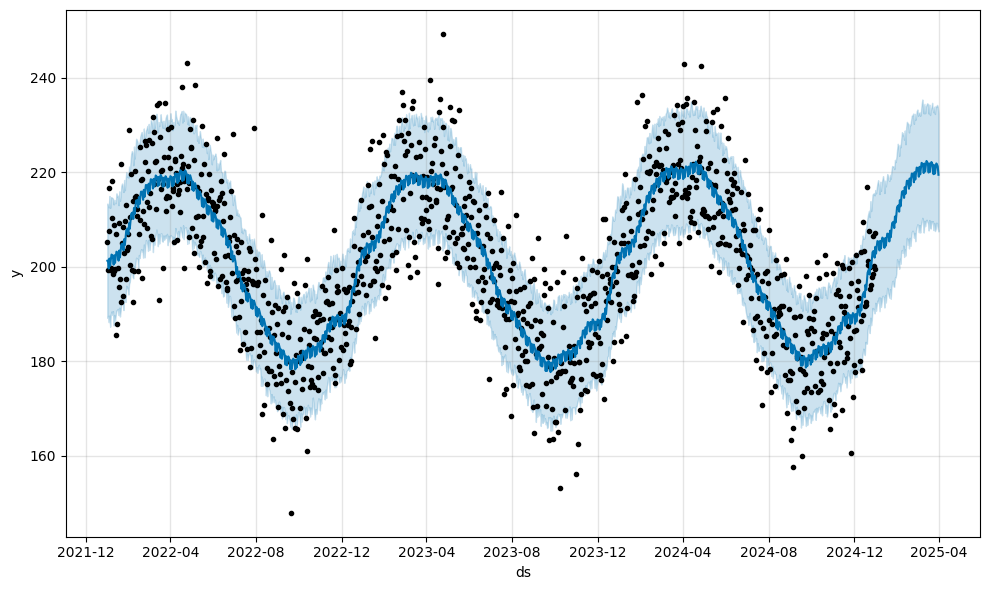

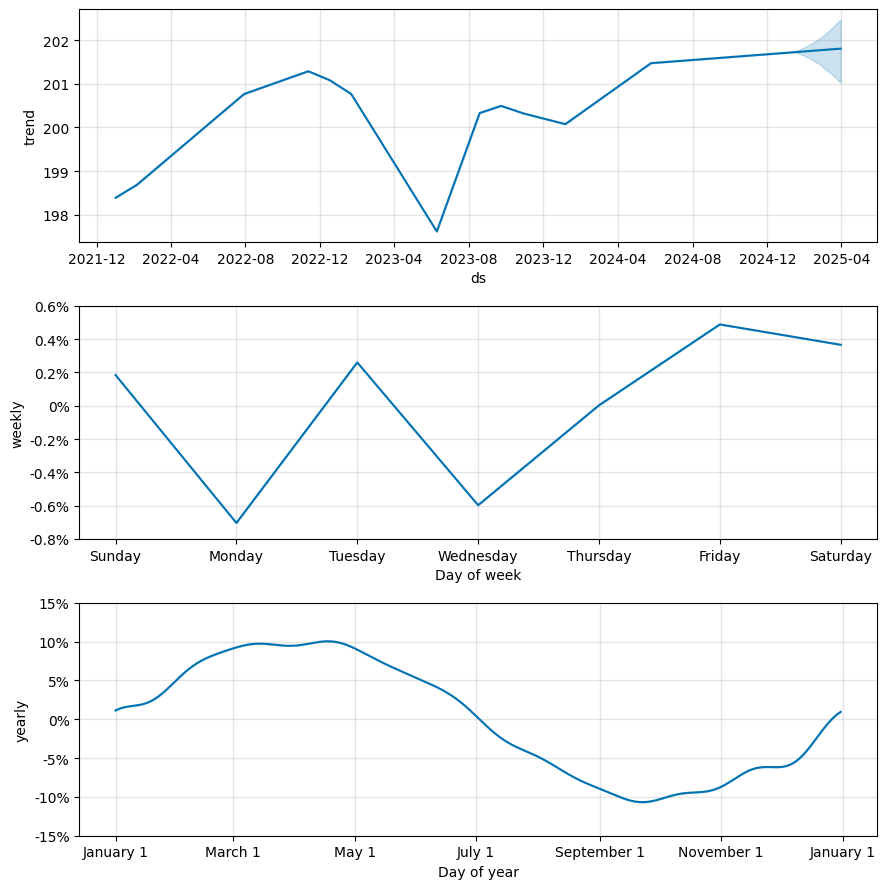

In [22]:
# Plot forecast
# historical data = black dots
# forecasted values = blue line
# uncertainty interval = shaded area
fig1 = model.plot(forecast)
plt.show()

# Plot components (trends, seasonality)
# trend,yearly,weekly
fig2 = model.plot_components(forecast)
plt.show()

## **Export forecast to CSV for Power BI**

In [11]:
# Save forecast data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast.csv', index=False)


In [26]:
from google.colab import files
files.download('sales_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Accuracy**

In [25]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
df_cv = cross_validation(
    model,
    initial='365 days', # First 1 year used for training
    period='180 days',  # Make a prediction every 180 days
    horizon='90 days')  # Each prediction is for 90 days into the future

# Get performance metrics
df_p = performance_metrics(df_cv)

# View metrics
print(df_p.head())


INFO:prophet:Making 4 forecasts with cutoffs between 2023-04-11 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/i5dyqvq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/rqrggepx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79010', 'data', 'file=/tmp/tmp9o55tbtm/i5dyqvq4.json', 'init=/tmp/tmp9o55tbtm/rqrggepx.json', 'output', 'file=/tmp/tmp9o55tbtm/prophet_modelvabrqk3b/prophet_model-20250702182544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/p4wpf33r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9o55tbtm/qvkgqc6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon         mse       rmse        mae      mape     mdape     smape  \
0  9 days  148.002596  12.165632  10.284088  0.051624  0.047022  0.051675   
1 10 days  123.263867  11.102426   8.968853  0.044333  0.037309  0.044594   
2 11 days  127.337001  11.284370   9.192672  0.045434  0.047022  0.045704   
3 12 days  127.725197  11.301557   9.109783  0.045087  0.047069  0.045291   
4 13 days  150.365483  12.262360   9.617956  0.046693  0.048110  0.047134   

   coverage  
0  0.638889  
1  0.694444  
2  0.666667  
3  0.638889  
4  0.611111  


MSE / RMSE → How big the errors are (lower = better)

MAE → Average absolute error

MAPE → % error (good for interpreting scale)

Coverage → % of actual values that fell within the uncertainty band